In [39]:
import numpy as np
import pandas as pd
import datetime as dt
import openpyxl as pxl

from matplotlib import pyplot as plt
from scipy import interpolate

## Spotpreis Profil

In [40]:
this_profile = pd.read_csv("stock_price_profile_2019.csv")

print(len(this_profile))
this_profile['start_timestamp'] = pd.to_datetime(this_profile['start_timestamp'])
this_profile['end_timestamp'] = pd.to_datetime(this_profile['end_timestamp'])
this_profile = this_profile.set_index('start_timestamp')
this_profile

8760


,Unnamed: 0,end_timestamp,marketprice,unit
start_timestamp,,,,
2018-12-31 23:00:00,0,2019-01-01 00:00:00,28.32,Eur/MWh
2019-01-01 00:00:00,1,2019-01-01 01:00:00,10.07,Eur/MWh
2019-01-01 01:00:00,2,2019-01-01 02:00:00,-4.08,Eur/MWh
2019-01-01 02:00:00,3,2019-01-01 03:00:00,-9.91,Eur/MWh
2019-01-01 03:00:00,4,2019-01-01 04:00:00,-7.41,Eur/MWh
...,...,...,...,...
2019-12-31 18:00:00,8755,2019-12-31 19:00:00,46.00,Eur/MWh
2019-12-31 19:00:00,8756,2019-12-31 20:00:00,42.20,Eur/MWh
2019-12-31 20:00:00,8757,2019-12-31 21:00:00,39.74,Eur/MWh


In [41]:
mean_line = np.ones((len(this_profile),1)) + this_profile['marketprice'].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

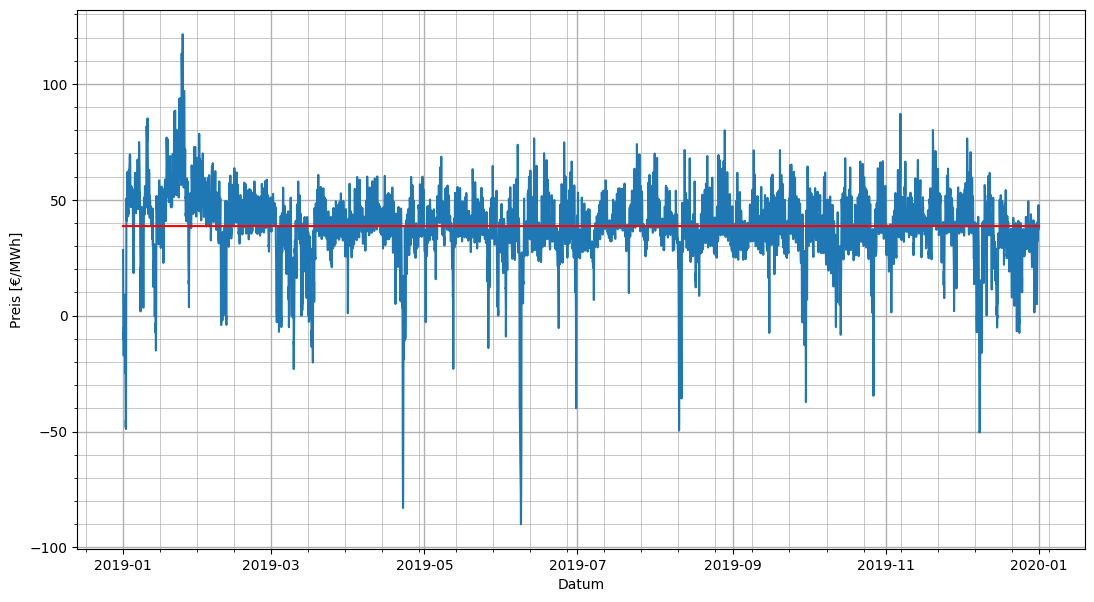

In [42]:
plt.subplots(figsize=(13,7))
plt.plot( this_profile['marketprice'])
plt.plot( this_profile.index, mean_line, color="red")
#plt.title('Strompreis 2018 [€/MWh] ')
plt.xlabel('Datum')
plt.ylabel('Preis [€/MWh]')
plt.minorticks_on()
plt.grid(True, which='major', linewidth=1)
plt.grid(True, which='minor', linewidth=0.5)
#plt.savefig('..\\output\\graphs\\Strompreis_2018.png')
#plt.savefig('..\\output\\graphs\\Strompreis_2018.svg')
plt.show


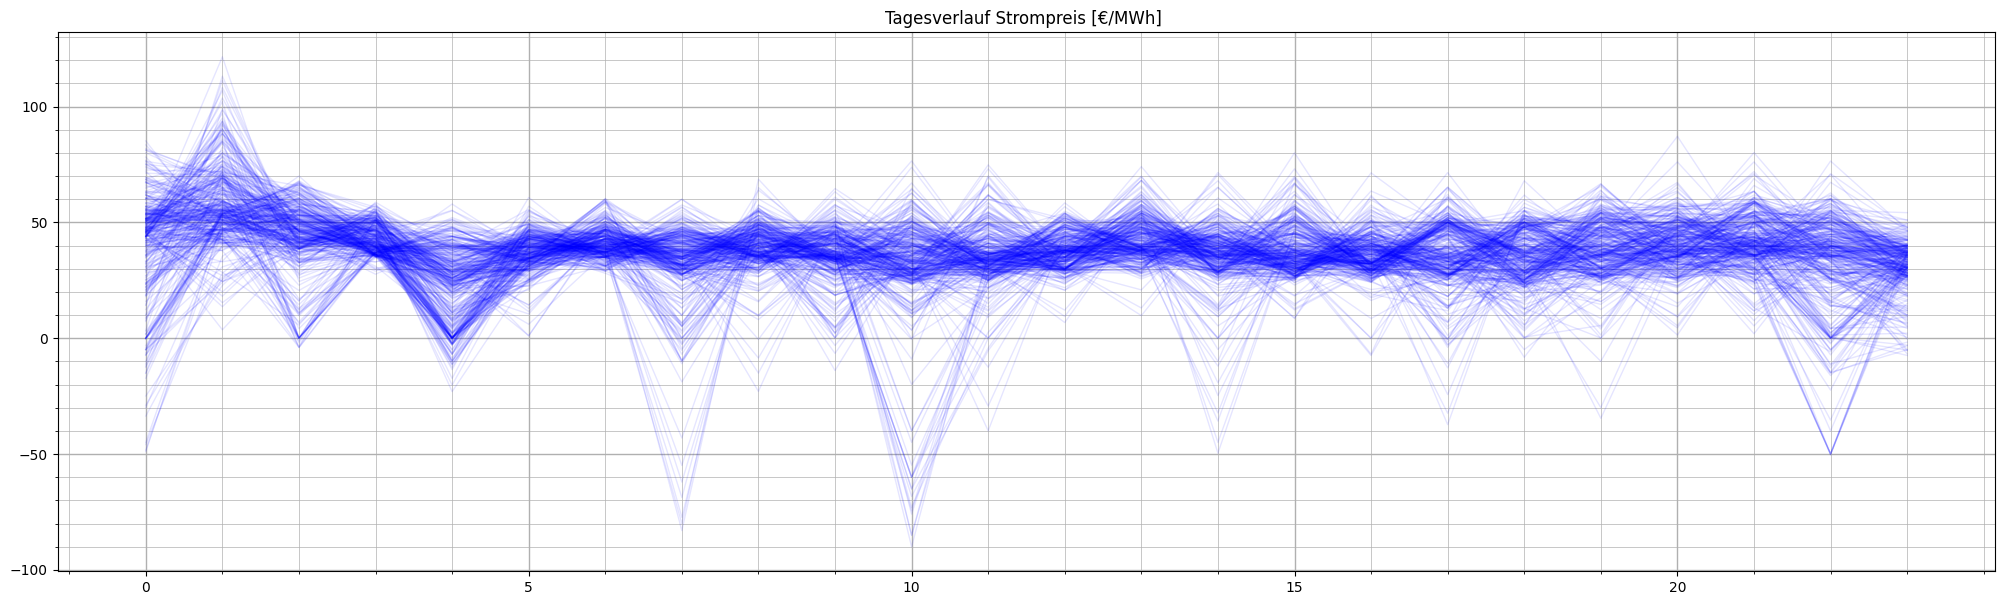

In [43]:
price_matrix = np.reshape(this_profile['marketprice'].values, (24,-1)) 

plt.subplots(figsize=(25,7))
for Index in range(len(price_matrix[0,:])):
    plt.plot(price_matrix[:,Index], linewidth=1, color="blue", alpha = 0.1)
plt.minorticks_on()
plt.title('Tagesverlauf Strompreis [€/MWh] ')
plt.grid(True, which='major', linewidth=1)
plt.grid(True, which='minor', linewidth=0.5)
plt.show()

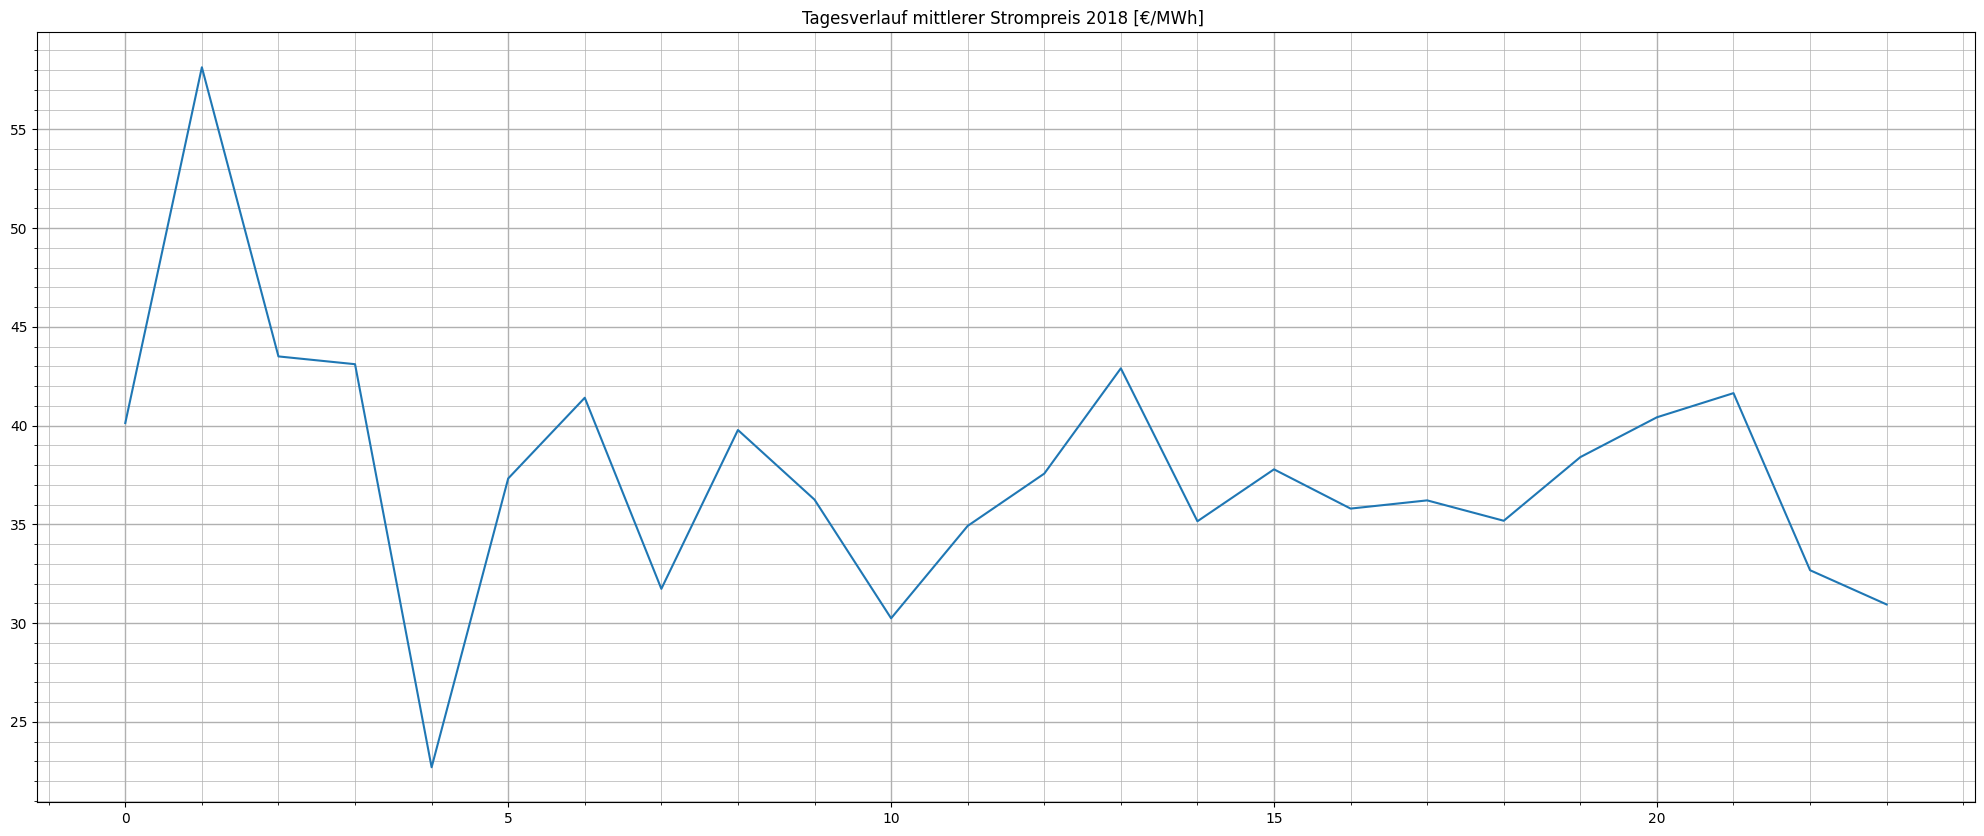

In [44]:
daily_mean = np.mean(price_matrix, axis=1)
plt.subplots(figsize=(25,10))
plt.plot(daily_mean)
plt.minorticks_on()
plt.title('Tagesverlauf mittlerer Strompreis 2018 [€/MWh] ')
plt.grid(True, which='major', linewidth=1)
plt.grid(True, which='minor', linewidth=0.5)
#plt.savefig('..\\output\\graphs\\Strompreis_daily_mean_2018.png')
plt.show()

## price level vs Hours:

In [45]:
# generate histogram
min = np.min(this_profile['marketprice'].values)
max = np.max(this_profile['marketprice'].values)
print("min: " + str(min) + "    max: " + str(max))
price_hist, bin_edges  = np.histogram(this_profile['marketprice'].values, bins=1000)
price_hist = np.array(price_hist)
bin_edges = np.array(bin_edges[1:])
#len(bin_edges[1:])

min: -90.01    max: 121.46


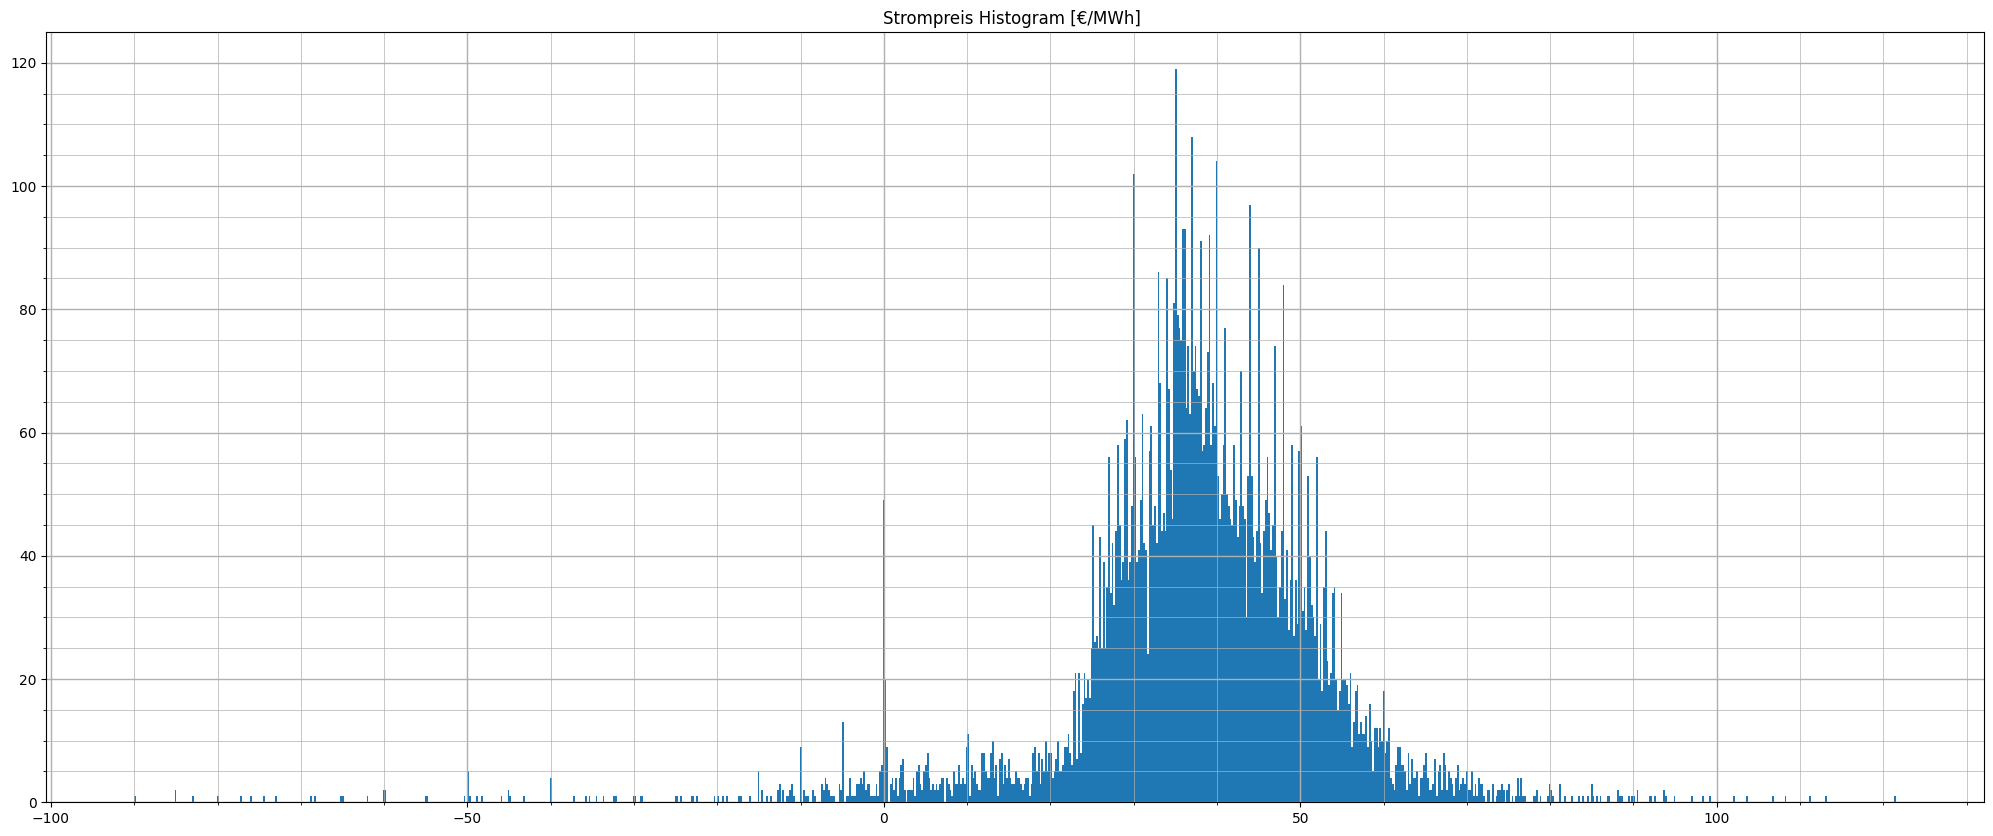

In [46]:
plt.subplots(figsize=(25,10))
plt.hist(this_profile['marketprice'].values, bins=1000) 
plt.title('Strompreis Histogram [€/MWh] ')
plt.minorticks_on()
plt.grid(True, which='major', linewidth=1)
plt.grid(True, which='minor', linewidth=0.5)
plt.show()

5000 VLS reached at price limit: 39.959 [€/MWh]


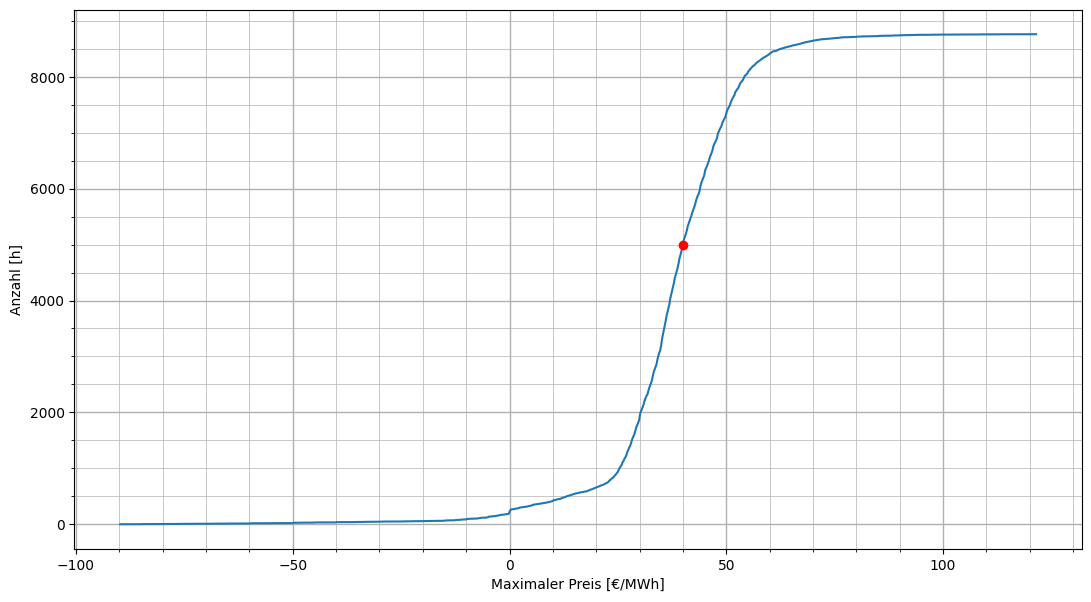

In [47]:
price_limit = []
n_hours = []
mean_price = []
sum_hours = 0
overall_Cost = 0
for n_times,price_level in zip(price_hist, bin_edges):
    #print(n_times, price_level)
    sum_hours = sum_hours + n_times
    overall_Cost = overall_Cost + n_times * price_level
    mean_price_so_far = overall_Cost / sum_hours
    mean_price.append(mean_price_so_far)
    price_limit.append(price_level)
    n_hours.append(sum_hours)

f = interpolate.interp1d(n_hours,price_limit) # interpolation function along x axis
VLS_limit = 5000
print("5000 VLS reached at price limit: " + str(np.round(f(VLS_limit),decimals=3)) + " [€/MWh]")
my_price_limit = f(VLS_limit)
plt.subplots(figsize=(13,7))
plt.plot(price_limit,n_hours)
plt.plot(f(VLS_limit), VLS_limit, 'or')
plt.xlabel('Maximaler Preis [€/MWh]')
plt.ylabel('Anzahl [h]')
#plt.title('VLS vs. Price Limit')
plt.minorticks_on()
plt.grid(True, which='major', linewidth=1)
plt.grid(True, which='minor', linewidth=0.5)
#plt.savefig('..\\output\\graphs\\S2_Preislimit_2018.png')
#plt.savefig('..\\output\\graphs\\S2_Preislimit_2018.svg')
plt.show()

### resulting mean price

mean price for 5000 VLS: 28.8112 [€/MWh]
mean price for 5000 VLS: 0.0288 [€/kWh]


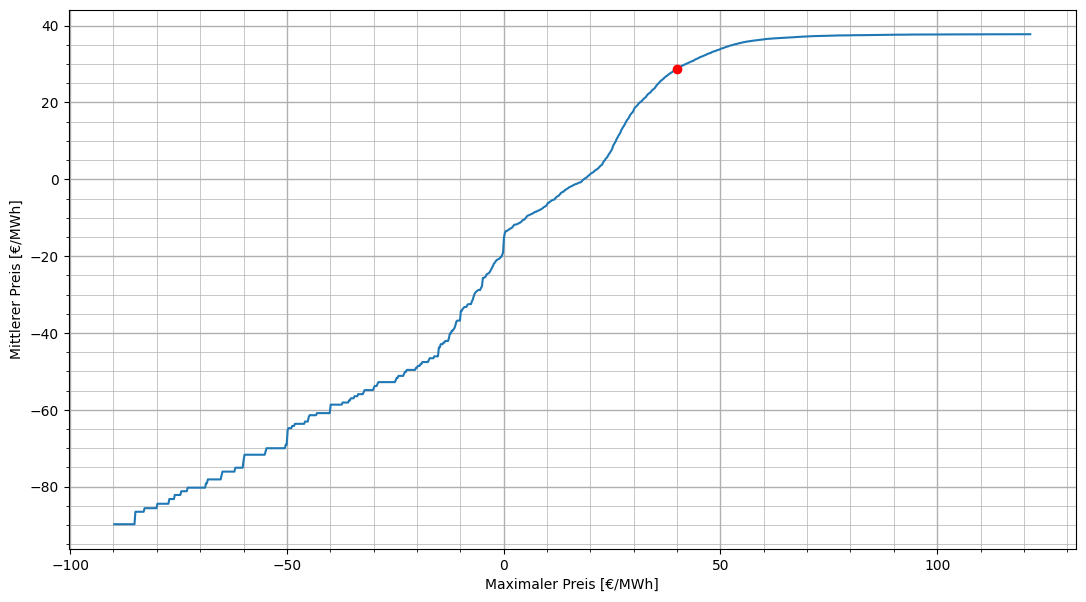

In [48]:
f_2 = interpolate.interp1d(price_limit, mean_price) # interpolation function along x axis
print("mean price for 5000 VLS: " + str(np.round(f_2(f(VLS_limit)), decimals=4)) + " [€/MWh]")
print("mean price for 5000 VLS: " + str(np.round(f_2(f(VLS_limit))/1000, decimals=4)) + " [€/kWh]")
my_mean_price = f_2(f(VLS_limit))
plt.subplots(figsize=(13,7))
plt.plot(price_limit, mean_price)
plt.plot(f(VLS_limit), f_2(f(VLS_limit)), 'or')
plt.xlabel('Maximaler Preis [€/MWh]')
plt.ylabel('Mittlerer Preis [€/MWh]')
#plt.title('mean price vs. price limit')
plt.minorticks_on()
plt.grid(True, which='major', linewidth=1)
plt.grid(True, which='minor', linewidth=0.5)
# plt.savefig('..\\output\\graphs\\S2_meanprice_vs_limit_2018.png')
# plt.savefig('..\\output\\graphs\\S2_meanprice_vs_limit_2018.svg')
plt.show()

### resulting production profile

In [49]:
f = interpolate.interp1d(n_hours,price_limit) # interpolation function along x axis
VLS_limit = 5000
print("5000 VLS reached at price limit: " + str(f(VLS_limit)) + " [€/MWh]")
my_price_limit = f(VLS_limit)

runtime_profile = []
for this_price in this_profile['marketprice'].values:
    if this_price<=my_price_limit:
        runtime_profile.append(1)
    else:
        runtime_profile.append(0)
        

5000 VLS reached at price limit: 39.95864865384614 [€/MWh]


In [50]:
runtime_profile = pd.DataFrame(runtime_profile, index=this_profile.index )

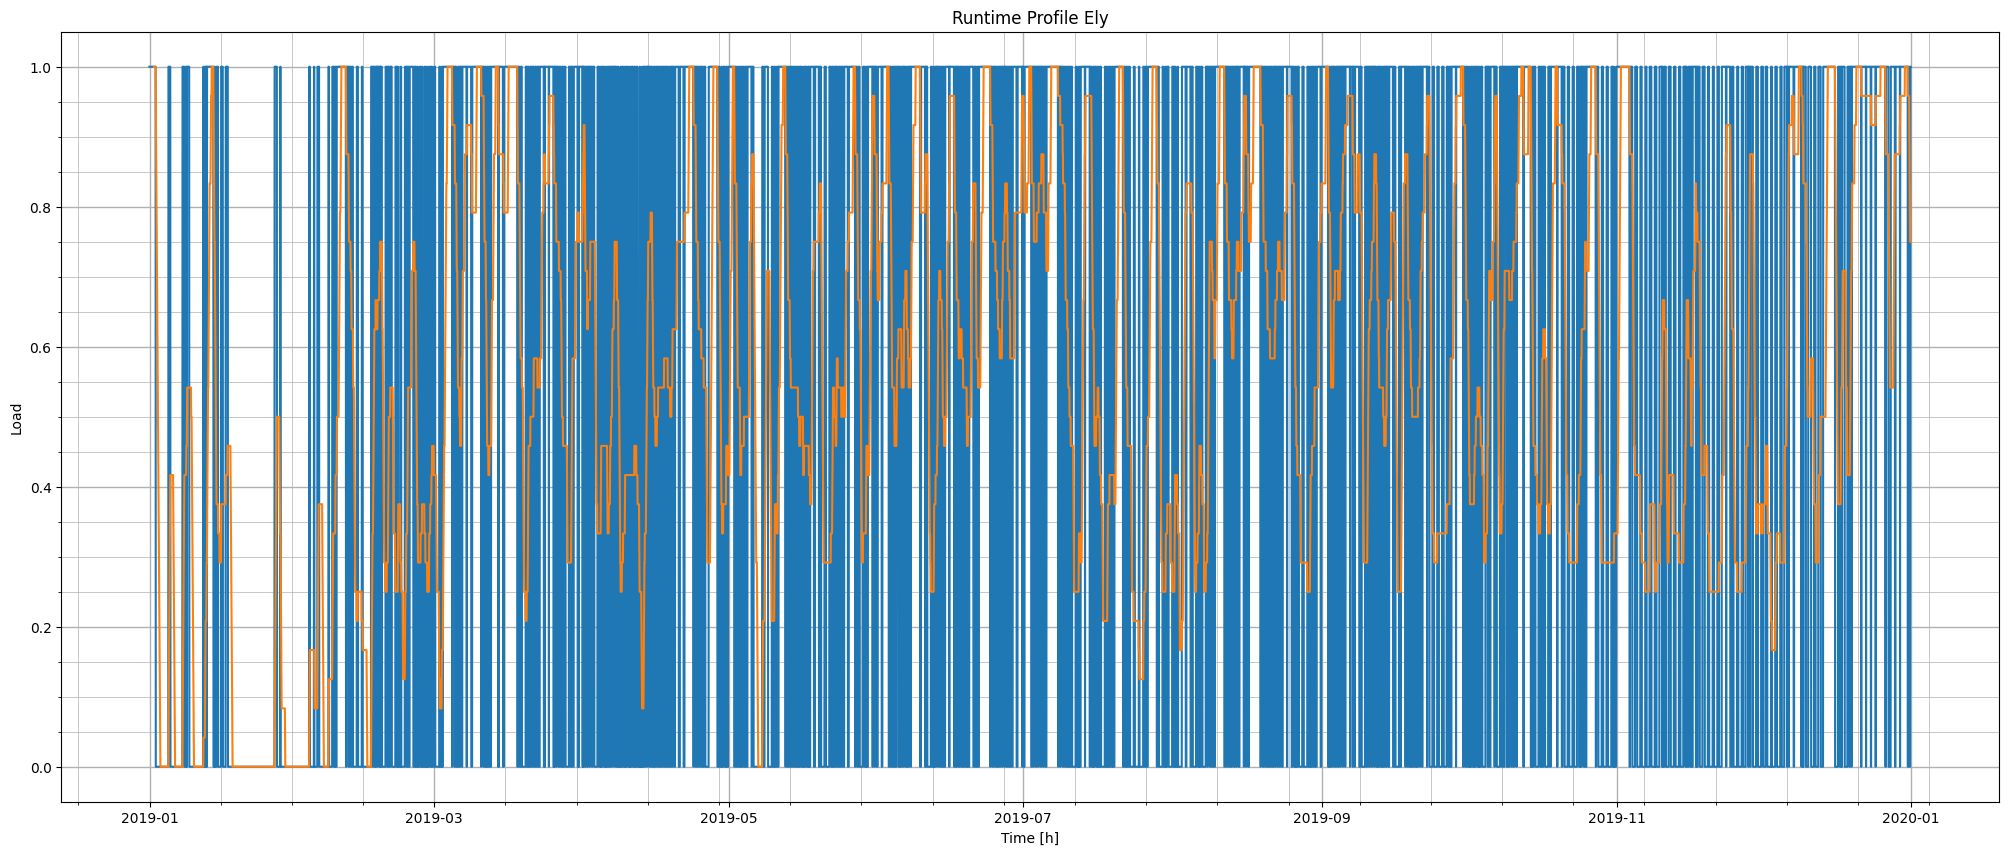

In [51]:
plt.subplots(figsize=(25,10))
plt.plot(runtime_profile)
plt.plot(runtime_profile.rolling(window=24).mean())
plt.xlabel('Time [h]')
plt.ylabel('Load')
plt.title('Runtime Profile Ely')
plt.minorticks_on()
plt.grid(True, which='major', linewidth=1)
plt.grid(True, which='minor', linewidth=0.5)
#plt.savefig('..\\output\\graphs\\S2_Laufprofil_2018.png')
plt.show()

## analyze OFF- and ON- Times

In [52]:
old_status = runtime_profile.values[0]
tmp_interval = 0
on_intervals = []
off_intervals = []
for Value in runtime_profile.values:
    currentStatus = Value
    if currentStatus == old_status:
        tmp_interval = tmp_interval + 1
    else:
        if old_status == 1:
            on_intervals.append(tmp_interval)
            old_status = 0
        elif old_status == 0:
            off_intervals.append(tmp_interval)
            old_status = 1
        tmp_interval = 0


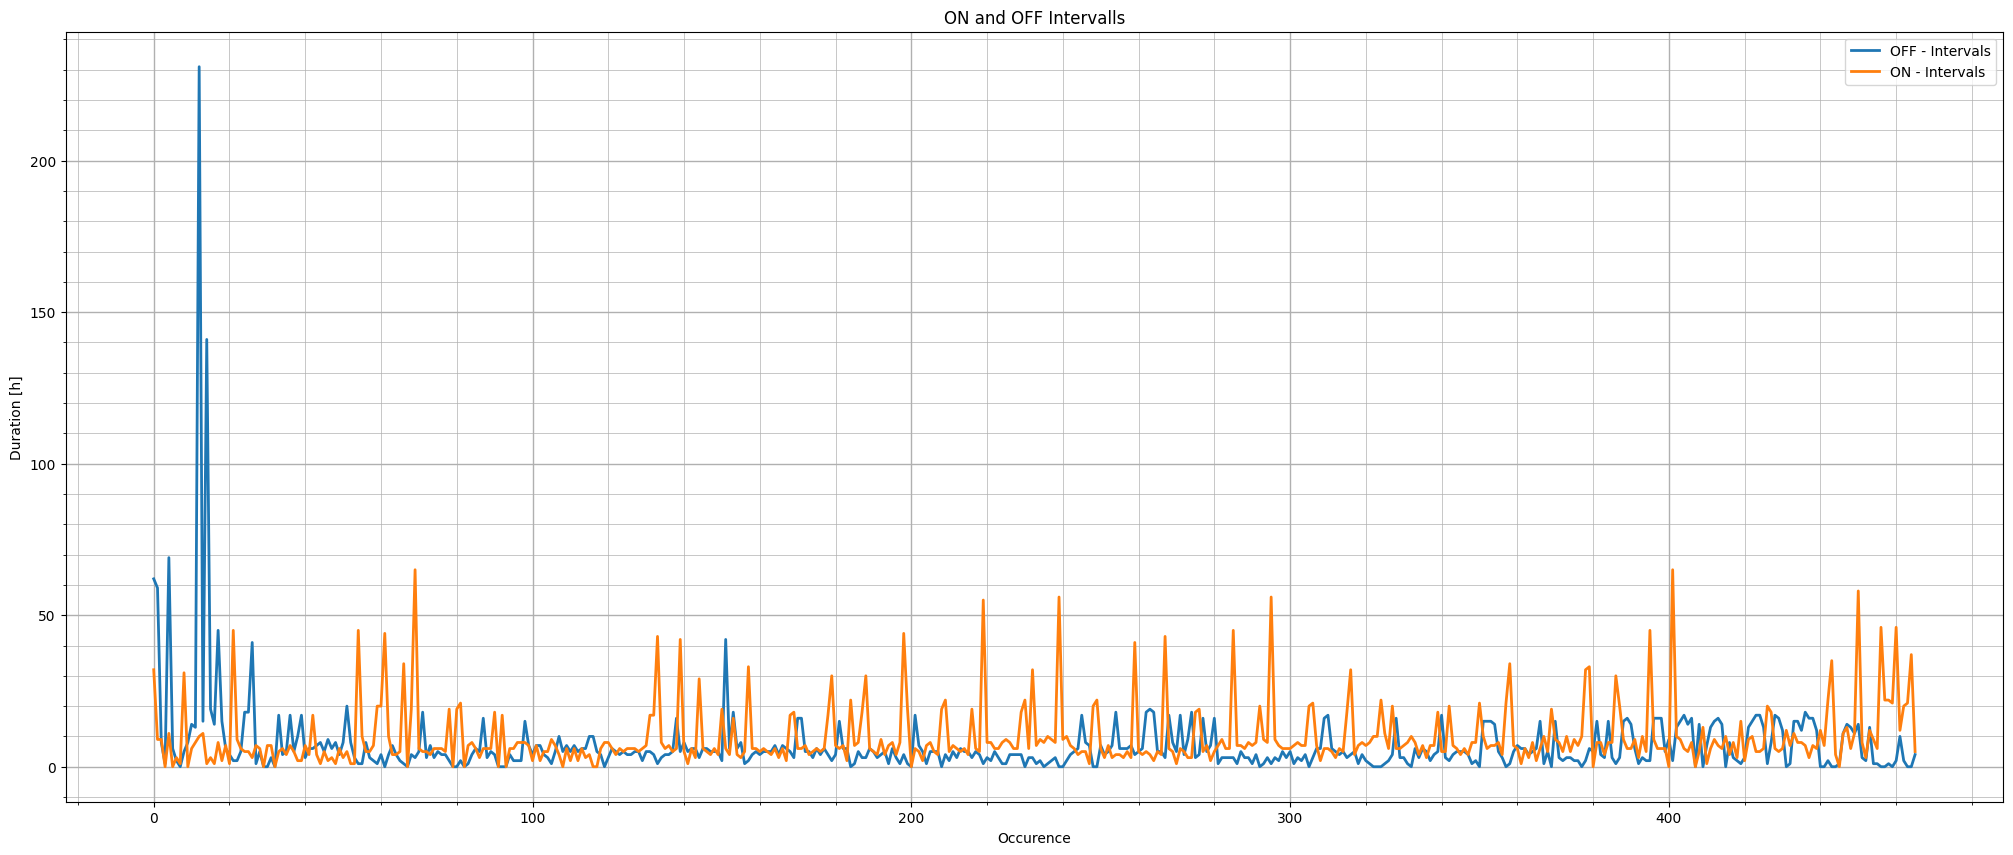

In [53]:
plt.subplots(figsize=(25,10))
plt.plot(off_intervals, linewidth=2, label="OFF - Intervals")
plt.plot(on_intervals, linewidth=2, label="ON - Intervals")

plt.minorticks_on()
plt.title('ON and OFF Intervalls')
plt.xlabel('Occurence')
plt.ylabel('Duration [h]')
plt.legend()
plt.grid(True, which='major', linewidth=1)
plt.grid(True, which='minor', linewidth=0.5)
#plt.savefig('..\\output\\graphs\\Szenario2_ON_OFF_Intervalls_2018.png')
plt.show()

In [54]:
len(on_intervals)

466